In [2]:
using CSV, DataFrames, Gadfly, Distributions, SparseArrays, LinearAlgebra

include("iGMRF.jl");
include("dataGen.jl");

# Création de la grille à 9 cellules

Chaque cellule est représentée par un triplet $[\mu, \sigma, \xi]$ indiquant les vraie valeur des paramètres de la GEV à déterminer.

In [277]:
# Seed
Random.seed!(400)
# Dimensions de la grille
m₁ = 3;
m₂ = 3;
# Nb total de cellules
m = m₁ * m₂
# Hyperparamètres
κᵤ = 10.0;
# Matrice de structure
F = iGMRF(m₁, m₂, κᵤ);
# Grille cible
grid_target = generateTargetGrid(F);

In [278]:
grid_target[:, :, 1]

3×3 Matrix{Float64}:
 -0.00410476  -0.00633878   -0.422121
  0.204839     0.0242109    -0.151817
  0.326333     0.000220887   0.0287778

# Génération de données

Le but est de générer des données sur chaque cellule à partir des paramètres de la GEV de la grille cible.

In [279]:
nobs = 1000
data = generateData(grid_target, nobs);

# Modèle 

In [302]:
include("malaWG.jl");

niter = 1000
h = 0.000001
θ₀ = vcat([0], zeros(m))
F = iGMRF(m₁, m₂, 0)
nchains = 1;

κᵤ, μ = malaWG(niter, h, θ₀, Y=data, F=F, nchains=nchains);

warming_size = Int(0.1 * niter)

κ̂ᵤ = mean(κᵤ[warming_size:end, 1]);
μ̂ = mean(μ.value[warming_size:end, :, 1], dims=1);

Taux d'acceptation chaîne 1: 0.0


In [291]:
reshape(μ̂, m₁, m₂)'

3×3 adjoint(::Matrix{Float64}) with eltype Float64:
 10.0  10.0  10.0
 10.0  10.0  10.0
 10.0  10.0  10.0

In [285]:
grid_target[:, :, 1]

3×3 Matrix{Float64}:
 -0.00410476  -0.00633878   -0.422121
  0.204839     0.0242109    -0.151817
  0.326333     0.000220887   0.0287778

Distance entre les deux matrices

In [286]:
norm(reshape(μ̂, m₁, m₂)' .- grid_target[:, :, 1], 2) / m

0.009315576431750345

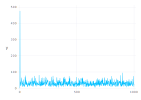

In [287]:
plot(y=κᵤ, Geom.line)

In [288]:
κ̂ᵤ

29.871829355570775

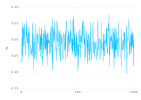

In [289]:
plot(y=μ.value[:, 1, 1], Geom.line)

In [118]:
using Mamba

sim = Chains(
    copy(θ'), 
    names=[
        "κᵤ", 
        "μ1",
        "μ2", 
        "μ3", 
        "μ4", 
        "μ5", 
        "μ6", 
        "μ7", 
        "μ8", 
        "μ9",
        "μ10",
        "μ11", 
        "μ12", 
        "μ13", 
        "μ14", 
        "μ15", 
        "μ16", 
        "μ17", 
        "μ18",
        "μ19",
        "μ20", 
        "μ21", 
        "μ22", 
        "μ23", 
        "μ24", 
        "μ25", 
        "μ26", 
        "μ27",
        "μ28",
        "μ29", 
        "μ30", 
        "μ31", 
        "μ32", 
        "μ33", 
        "μ34", 
        "μ35", 
        "μ36"
    ]
);

summarystats(sim)

DimensionMismatch: DimensionMismatch: size(value, 2) and names length differ